#### <h1> Assignment 3: Data Visualization</h1>
DATA 3000 202102 (Cofer)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#" data-toc-modified-id="-0"></a></span></li><li><span><a href="#-Problem-1-(10-Points)-" data-toc-modified-id="-Problem-1-(10-Points)--1"> Problem 1 (10 Points) </a></span></li><li><span><a href="#-Problem-2-(10-Points)" data-toc-modified-id="-Problem-2-(10-Points)-2"> Problem 2 (10 Points)</a></span></li><li><span><a href="#-Problem-3-(5-Points)" data-toc-modified-id="-Problem-3-(5-Points)-3"> Problem 3 (5 Points)</a></span></li><li><span><a href="#-Problem-4-(5-Points)" data-toc-modified-id="-Problem-4-(5-Points)-4"> Problem 4 (5 Points)</a></span></li><li><span><a href="#-Problem-5-(10-Points)" data-toc-modified-id="-Problem-5-(10-Points)-5"> Problem 5 (10 Points)</a></span></li><li><span><a href="#-Problem-6-(10-Points)" data-toc-modified-id="-Problem-6-(10-Points)-6"> Problem 6 (10 Points)</a></span></li><li><span><a href="#-Problem-7-(15-Points)" data-toc-modified-id="-Problem-7-(15-Points)-7"> Problem 7 (15 Points)</a></span></li><li><span><a href="#-Problem-8-(15-Points)" data-toc-modified-id="-Problem-8-(15-Points)-8"> Problem 8 (15 Points)</a></span></li><li><span><a href="#-Problem-9-(20-points)-" data-toc-modified-id="-Problem-9-(20-points)--9"> Problem 9 (20 points) </a></span></li></ul></div>

<b><hr>
<p> In this assignment, you will practice representing data visually for both analysis and communication.The assignment is worth a total of 100 points.</p>
   
<span style="color:red"> Comprehensive analyses that do only the minimum can earn at most a 'B.' 'A' level submissions must include more!

<p> Remember to "Restart & Run All" from the `Kernel` menu before submitting. This will make sure your code runs as you expect it to, and it will include all output cells in your submission, which I require. You may input additional cells into your solutions as necessary.</p>
<hr>
</b>

<div class="alert alert-block alert-danger">
    
Include clear explanations and keep the notebook organized. 

Other important information:
<ul>
    <li> I will give you increasingly less structure for your solutions as we move through the course. My lectures give you a roadmap to the types of problems you will encounter with data and some approaches to solutions. Use my lecture notebooks, your textbook, and online resources to formulate your solutions.</li>
    <li> Don't blow off the commenting requirements. Comments/explanations are worth points because they hold a lot of value. Data science relies heavily on analysts' communication skills. </li>
    <li> I have reviewed the content of the datafile used in this assignment and I find that all included data is reasonably accurate, at least for some point in time. (Thus, if you find an outlier, you can assume that it is a true value.)</li>
    <ul>
</div>

<div class="alert alert-block alert-warning">
Be sure you have installed all of the packages below before trying to import them. Once you are sure you have installed these packages, execute the cell below to import them. 
</div>

In [1]:
import pandas as pd #if you need other libraries, import them!
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

<div class="alert alert-block alert-warning">
 Execute the cell below to load the data from <code>movie_ratings2.csv</code> into a dataframe. Remember that the code assumes that the csv is in the same directory as your notebook file. If not, you will have to change the path so that python can find the file! 
    
**Important**: You can (and *should*) read about this data set, including a description of all of the variables, [here.](http://www2.stat.duke.edu/~mc301/data/movies.html)   
    
Note that I removed a handfull of columns for the purposes of this assignment. Also, the original dataset is an RData file. I have converted it to csv format.    
</div>

In [2]:
df = pd.read_csv('./movie_ratings2.csv') #read file into a dataframe

<div class="alert alert-block alert-info">
    
<h4> Problem 1 (10 Points) </h4>
    
Basics + Find and Fix Missing Values:    

- View the first 5 rows of the dataframe df.
- Use a command to list the column titles.
- Use a command to view the data types
    
- I have cleaned most of the data for you, but there are a handfull of fields in this dataframe that are missing values. Find these and use the appropriate `imdb_url` to look up and fill in the missing data.
    
There are different ways to approach this, but you may find the following commands useful:
    
- `df[df.isnull().any(axis=1)]` returns any rows that have missing data.
- `df.isna().sum()` will return the variable names with a count of missing values for each.
- You can use the `loc` method to fill in fields using the index number and variable name. For example, if df is missing data in index (row) 33, column 'K', and you want to fill it with the string 'blah', you can use the command: `df.loc[33,'K']='blah'` 
    
Once you are done, execute the command `df.isnull().values.sum()` to verify that you have no missing data.    
    
    
</div>

In [3]:
df.head()

,title,title_type,genre,runtime,mpaa_rating,thtr_rel_year,thtr_rel_month,thtr_rel_day,imdb_rating,imdb_num_votes,...,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,2013.0,4.0,19.0,5.5,899,...,73.0,no,no,no,no,no,no,Michael D. Olmos,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,2001.0,3.0,14.0,7.3,12285,...,81.0,no,no,no,no,no,no,Rob Sitch,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,1996.0,8.0,21.0,7.6,22381,...,91.0,no,no,no,no,no,no,Christopher Guest,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,1993.0,10.0,1.0,7.2,35096,...,76.0,no,no,yes,no,yes,no,Martin Scorsese,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,2004.0,9.0,10.0,5.1,2386,...,27.0,no,no,no,no,no,no,Stevan Mena,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


In [4]:
#overview of column stats
df.describe()

,runtime,thtr_rel_year,thtr_rel_month,thtr_rel_day,imdb_rating,imdb_num_votes,critics_score,audience_score
count,650.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,105.821538,1997.941628,6.740399,14.416283,6.493088,57532.983103,57.688172,62.362519
std,19.445047,10.974501,3.554223,8.861167,1.084747,112124.386910,28.402971,20.222624
min,39.000000,1970.000000,1.000000,1.000000,1.900000,180.000000,1.000000,11.000000
25%,92.000000,1990.000000,4.000000,7.000000,5.900000,4545.500000,33.000000,46.000000
50%,103.000000,2000.000000,7.000000,15.000000,6.600000,15116.000000,61.000000,65.000000
75%,115.750000,2007.000000,10.000000,21.000000,7.300000,58300.500000,83.000000,80.000000
max,267.000000,2014.000000,12.000000,31.000000,9.000000,893008.000000,100.000000,97.000000


In [5]:
#identifying column names and data types
df.dtypes

title                object
title_type           object
genre                object
runtime             float64
mpaa_rating          object
thtr_rel_year       float64
thtr_rel_month      float64
thtr_rel_day        float64
imdb_rating         float64
imdb_num_votes        int64
critics_rating       object
critics_score       float64
audience_rating      object
audience_score      float64
best_pic_nom         object
best_pic_win         object
best_actor_win       object
best_actress_win     object
best_dir_win         object
top200_box           object
director             object
imdb_url             object
rt_url               object
dtype: object

In [6]:
print("Unique values in each column")
print("----------------------------")
for column in df:
    print(column + " : " + str(len(pd.unique(df[column]))))

Unique values in each column
----------------------------
title : 647
title_type : 3
genre : 11
runtime : 90
mpaa_rating : 6
thtr_rel_year : 44
thtr_rel_month : 12
thtr_rel_day : 31
imdb_rating : 56
imdb_num_votes : 644
critics_rating : 3
critics_score : 99
audience_rating : 2
audience_score : 84
best_pic_nom : 2
best_pic_win : 2
best_actor_win : 2
best_actress_win : 2
best_dir_win : 2
top200_box : 2
director : 533
imdb_url : 650
rt_url : 650


In [7]:
df.isna().sum()

title               0
title_type          0
genre               0
runtime             1
mpaa_rating         0
thtr_rel_year       0
thtr_rel_month      0
thtr_rel_day        0
imdb_rating         0
imdb_num_votes      0
critics_rating      0
critics_score       0
audience_rating     0
audience_score      0
best_pic_nom        0
best_pic_win        0
best_actor_win      0
best_actress_win    0
best_dir_win        0
top200_box          0
director            2
imdb_url            0
rt_url              0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,title,title_type,genre,runtime,mpaa_rating,thtr_rel_year,thtr_rel_month,thtr_rel_day,imdb_rating,imdb_num_votes,...,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,imdb_url,rt_url
171,Lorenzo's Oil,Feature Film,Drama,129.0,PG-13,1992.0,12.0,30.0,7.2,15913,...,79.0,no,no,no,yes,no,no,NaN,http://www.imdb.com/title/tt0104756/,//www.rottentomatoes.com/m/lorenzos_oil/
333,The End of America,Documentary,Documentary,NaN,Unrated,2008.0,10.0,1.0,7.5,739,...,72.0,no,no,no,no,no,no,Anne Sundberg,http://www.imdb.com/title/tt1294790/,//www.rottentomatoes.com/m/end_of_america/
459,The Ninth Gate,Feature Film,Mystery & Suspense,133.0,R,1999.0,12.0,24.0,6.7,134031,...,57.0,no,no,no,no,no,no,NaN,http://www.imdb.com/title/tt0142688/,//www.rottentomatoes.com/m/ninth_gate/


<div class="alert alert-block alert-success">
    <h3>Basics + Fixing Missing Data</h3>
With some basic analysis, we can see from the describe method that the numbers don't show anything extraordinary. There are no unusual outliers or numbers that look out of place. The number of unique values in each column identifies something we could possibly alter down the line, considering that the columns from best_pic_nom to top200_box contain only two uniques values, yes and no. These columns could either be dropped or altered to values that are easier to work with. Also, some rows contain missing values, however the number of missing values is relatively low. This means it is likely the information could be searched and manualy inserted. If the information cannot be found then since the number of missing values is low it will likely not alter any data analysis performed.
</div>

In [9]:
# Filling in missing data from rows 171, 333, and 459
df.loc[171, "director"] = "George Miller"
df.loc[459, "director"] = "Roman Polanski"
df.loc[333, "runtime"] = 74.0

In [10]:
#confirming NaN values have been replaced
df[df.isnull().any(axis=1)]

,title,title_type,genre,runtime,mpaa_rating,thtr_rel_year,thtr_rel_month,thtr_rel_day,imdb_rating,imdb_num_votes,...,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,imdb_url,rt_url


<div class="alert alert-block alert-info">

<h4> Problem 2 (10 Points)</h4>

Visualization for analysis: Do a univariate analysis of the `runtime` variable by producing a density histogram and approximate PDF (graphed together) as well as a boxplot. I have already confirmed that outliers are true values, so do not drop or replace them. However, you should investigate any interesting features uncovered during your analysis such as a very frequent value or any extreme outliers. Summarize and interpret what you find. Code can be adapted from Topic 4B, presented in class and made available on the course website. 
</div>

In [11]:
#add more code cells as necessary. comment your code well
df_runtime = df["runtime"]
df_runtime.head()

0     80.0
1    101.0
2     84.0
3    139.0
4     90.0
Name: runtime, dtype: float64

In [12]:
print("Minimum film length: " + str(df_runtime.min()))
print("Maximum film length: " + str(df_runtime.max()))

Minimum film length: 39.0
Maximum film length: 267.0


In [13]:
# fitting normal distribution to data and importing norm from scipy.stats
from scipy.stats import norm
mu, std = norm.fit(df_runtime)

In [14]:
weights = np.ones_like(df_runtime)/float(len(df_runtime))

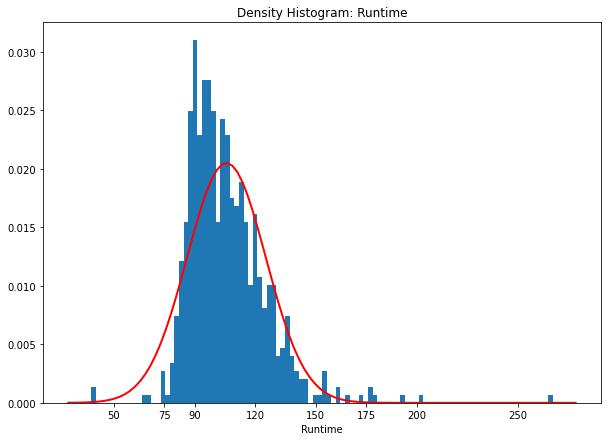

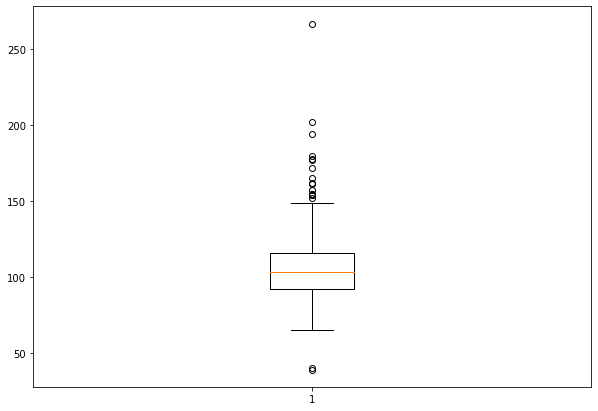

In [15]:
fig = plt.figure(figsize=(10, 7))
plt.hist(df_runtime, density=True, bins=100, weights=weights)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y_pdf = norm.pdf(x, mu, std)
plt.title("Density Histogram: Runtime")
plt.xlabel("Runtime")
plt.xticks([50, 75, 90, 120,150, 175, 200, 250])
plt.plot(x, y_pdf, color="red", linewidth=2)
fig = plt.figure(figsize=(10, 7))
runtime_boxplot = plt.boxplot(df_runtime)

<div class="alert alert-block alert-success">
    <h3>Density Histogram Findings</h3>
Judging from the density histogram, we can tell the information is relatively normaly distributed according to the plotted pdf over the histogram. The histogram is scewed to the right with most of the runtime data poits being between 75 and 140. Most of the data points are at the 90 minute mark, which makes sense that an hour and a half would be the most common runtime. After the 90 minute runtime, the runtime lengths start to diminish.
</div>

In [16]:
boxplot_outliers = runtime_boxplot['fliers'][0].get_data()[1]
boxplot_outliers

array([ 39.,  40., 178., 154., 162., 165., 157., 155., 154., 267., 161.,
       202., 180., 172., 155., 177., 152., 194.])

<div class="alert alert-block alert-success">
    <h3>Boxplot Findings</h3>
No irregularities are apparent when viewing the outliers within the boxplot. Only two outliers are below the interquartile range, more are above the IQR but all seem reasonable. Just to make sure we can look up the min and the max outlier to confirm runtimes.
</div>

In [17]:
min_runtime = df[df["runtime"] == 39]
max_runtime = df[df["runtime"] == 267]
print(min_runtime["imdb_url"])
print(max_runtime["imdb_url"])

130    http://www.imdb.com/title/tt0109049/
Name: imdb_url, dtype: object
232    http://www.imdb.com/title/tt0095341/
Name: imdb_url, dtype: object


<div class="alert alert-block alert-info">

<h4> Problem 3 (5 Points)</h4>

Visualization for analysis: Create a heatmap of the quantitative data in df and observe that  `imdb_score` and `audience_score` are highly correlated. Code can be adapted from Topic 4B, presented in class and made available on the course website. 
</div>

In [18]:
quantitative_columns = []
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        quantitative_columns.append(column)
quantitative_columns

['runtime',
 'thtr_rel_year',
 'thtr_rel_month',
 'thtr_rel_day',
 'imdb_rating',
 'imdb_num_votes',
 'critics_score',
 'audience_score']

<AxesSubplot:>

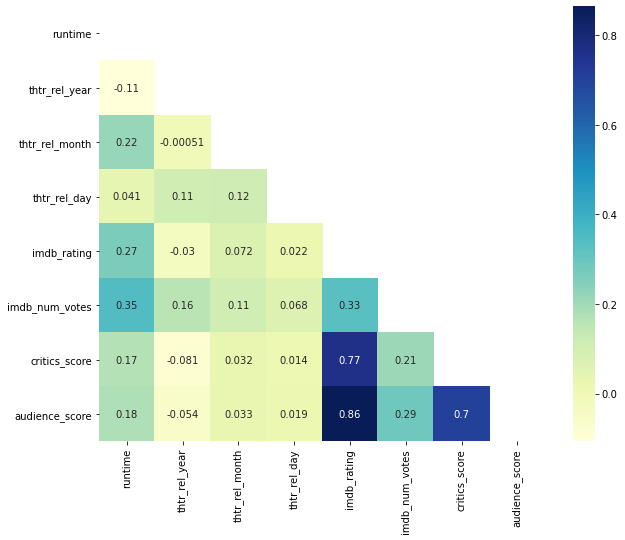

In [19]:
mask = np.triu(np.ones_like(df.corr())) 
fig, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(df[[column for column in quantitative_columns]].corr(), cmap="YlGnBu", mask=mask, annot=True)

<div class="alert alert-block alert-info">

<h4> Problem 4 (5 Points)</h4>

Create and graph a regression model:
    
- Use the Numpy polyfit method to create a 1 dimensional regression model that predicts `audience_score` from `imdb_rating`.  
- Then use the Numpy poly1d method to turn this model into a function called `y`. 
- Finally, create a seaborn lmplot for `imdb_rating` (independent variable) and `audience_score` (dependent variable), and graph it on the same axes as your regression line. Use contrasting colors so that your regression line stands out against the points in the scatterplot.
    
Code can be adapted from Topic 4B, presented in class and made available on the course website. 
</div>

In [20]:
regression_model = np.polyfit(df["imdb_rating"], df["audience_score"], 1)
regression_model

array([ 16.12343649, -42.32836569])

In [21]:
y = np.poly1d(regression_model)

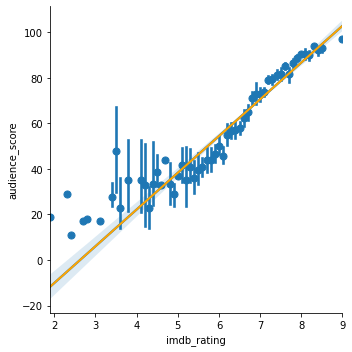

In [22]:
p = sb.lmplot(x="imdb_rating", y="audience_score", data=df[["imdb_rating",'audience_score']], x_estimator=np.mean, height=5)
ax = p.axes[0, 0]

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, y(x), 'k', linewidth=2, color='orange')
plt.tight_layout()

<div class="alert alert-block alert-info">

<h4> Problem 5 (10 Points)</h4>

Import new data and test your regression model:
    
- Import `movie_ratings_16_17.csv` as df2. In this dataset, the features of interest are called `imdb` and `audience`.
- Create a new dataframe **called df_test** containing only the `imdb` and `audience` data from `movie_ratings_16_17.csv`. To avoid a warning or possible error, you will need to use the `copy()` method for dataframes. For example, if you want to create the dataframe `new` from the dataframe `old` by selecting only the columns names `A` and `B`, you can use the command: `new = old[['A','B']].copy()`
- Finally, **create a new column in df_test called `aud_pred`** and fill it with **predicted** audience scores using the data in the `imdb` column and your regression function that you created in the previous question. To do this, you will want to use the `apply()` method and a `lambda function` as follows: `df_test['aud_pred'] = df_test.apply(lambda row: y(row['imdb']),axis=1)`.
- Print the *first 15* rows of your modified `df_test` dataframe.

</div>

In [23]:
df2 = pd.read_csv("movie_ratings_16_17.csv")
df2.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [24]:
df_test = df2[["imdb", "audience"]].copy()
df_test['aud_pred'] = df_test.apply(lambda row: y(row['imdb']),axis=1)
df_test.head(15)

,imdb,audience,aud_pred
0,7.2,79,73.760377
1,7.3,83,75.372721
2,6.6,47,64.086315
3,5.2,76,41.513504
4,6.1,57,56.024597
5,7.5,84,78.597408
6,7.4,79,76.985064
7,6.2,50,57.636941
8,7.1,66,72.148033
9,5.0,27,38.288817


<div class="alert alert-block alert-info">

<h4> Problem 6 (10 Points)</h4>

Visualize, analyze, and interpret how well your regression model, which was created using data from the `movie_ratings2.csv` dataset predicts the audience score in the `movie_ratings_16_17.csv` dataset:
    
- Create a seaborn lmplot for the df_test `audience` variable (independent variable) and df_test `aud_pred` variable (dependent variable). Do *not* graph your regression line because it does not make sense to do so. The lmplot will graph a best-fit line for these variables.
    - Use the `r2_score()` method from the `sklearn.metrics` package to compute <b>and print</b> the **predicted** $R^2$ statistic for `audience` and `aud_pred`. 
- Use your graph and the predicted $R^2$ value to write an interpretation that states and justifies how well you think your regression model predicted the audience scores in the second dataset. If you need to look up and read about the predicted $R^2$ statistic, do so.

</div>

In [25]:
lin_reg_model = np.polyfit(df_test["audience"], df_test["aud_pred"], 1)
lin_reg_model

array([ 0.71803924, 19.42122394])

In [26]:
y = np.poly1d(lin_reg_model)

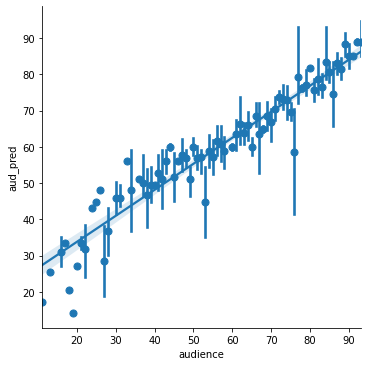

In [27]:
sb.lmplot(x="audience", y ="aud_pred", data=df_test, x_estimator=np.mean)

In [28]:
r2_score = r2_score(df_test["audience"], df_test["aud_pred"])
r2_score

0.7976767613269353

<div class="alert alert-block alert-success">
    <h3>Interpreting Regression Model and R2 Score</h3>
By looking at the regression model, the prediction came out to be fairly accurate. It was not as closely fit to the data set as the original one, but the prediction is generally fit. The <a href="https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit#:~:text=R%2Dsquared%20is%20a%20statistical,multiple%20determination%20for%20multiple%20regression.&text=100%25%20indicates%20that%20the%20model,response%20data%20around%20its%20mean.">R<sup>2</sup></a> score statistic gives more evidence that this model was fit relatively well, with a score of 80. Since the R<sup>2</sup> score is based off 0% to 100% with 0% indicating that the model explains none of the variability of the response data around its mean and 100% indicating that the model explains all the variability of the response data around its mean. 80% is pretty solid.
</div>

<div class="alert alert-block alert-info">

<h4> Problem 7 (15 Points)</h4>

Visualization for communication: Create a **donut** chart for the `mpaa_rating` variable in df. Your labels should be the ratings, and your data should be the `mpaa_rating` value counts (`value_counts()`). 
    
Be sure your graph is easy to read and has a color scheme that makes it easy to see the differences in the variables. The donut chart must include:
    
- A title
- The MPAA rating labels
- annotations for *both* the **percentages** and **counts** for each category. 
    
Following your donut chart, you must include a written interpretation that includes any insights you obtained from reviewing your donut chart.
    
Code can be adapted from Topic 4B, presented in class and made available on the course website.

</div>

In [29]:
mpaa_rating = df["mpaa_rating"]
mpaa_rating.value_counts()

R          329
PG-13      133
PG         118
Unrated     50
G           19
NC-17        2
Name: mpaa_rating, dtype: int64

In [30]:
ratings = ['R', 'PG-13', 'PG', 'Unrated', 'G', 'NC-17']
values = [rating for rating in mpaa_rating.value_counts()]

mpaa_donut = pd.DataFrame()
mpaa_donut['ratings'] = ratings
mpaa_donut['values'] = values
mpaa_donut

,ratings,values
0,R,329
1,PG-13,133
2,PG,118
3,Unrated,50
4,G,19
5,NC-17,2


Text(0.5, 1.0, 'MPAA Ratings')

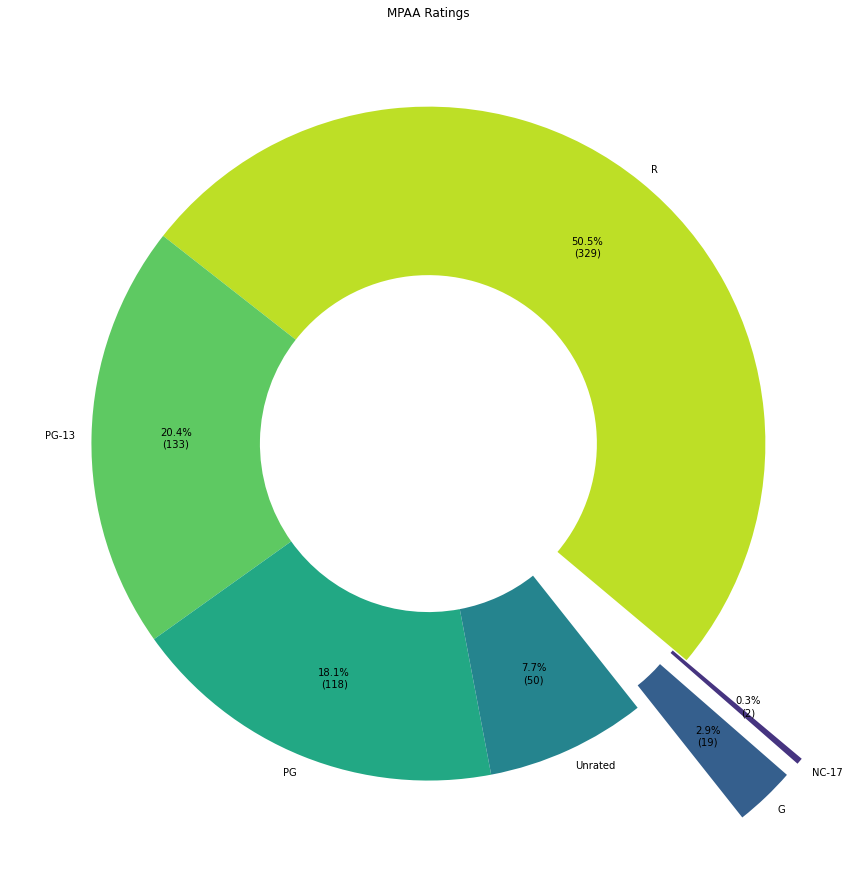

In [31]:
data = mpaa_donut['values']
labels = mpaa_donut['ratings']

colors_one = plt.cm.viridis
colors = [colors_one(0.9), colors_one(0.75), colors_one(0.60), colors_one(0.45), colors_one(0.30), colors_one(0.15)]
explode = (0, 0, 0, 0, .45, .45)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals),0))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(14, 12))
wedges, texts, autotexts = ax.pie(data, labels=labels, autopct=lambda pct: func(pct, data), explode=explode,wedgeprops=dict(width=0.5), colors=colors, startangle=-40, pctdistance=.75, labeldistance=1.05)

for wedge, txt in zip(wedges, autotexts):
    # the angle at which the text is located
    ang = (wedge.theta2 + wedge.theta1) / 2.
    # new coordinates of the text, 0.7 is the distance from the center 
    x = wedge.r * 1.25 * np.cos(ang*np.pi/180)
    y = wedge.r * 1.2 * np.sin(ang*np.pi/180)
    # if patch is narrow enough, move text to new coordinates
    if (wedge.theta2 - wedge.theta1) < 10:
        txt.set_position((x, y))

plt.tight_layout()
ax.set_title("MPAA Ratings")

<div class="alert alert-block alert-success">
    <h3>Donut Chart Interpretation</h3>
The rating of R controls the majority of the donut chart at 50.5%. Followed by PG-13 and PG at 20.4% and 18.1% respectively. The majority of movies would probably like to appeal to a wide audience, hence the reason that R, PG-13 and PG control 89% of the whole. These ratings allow for a wide range of ages to view which would allow for the greatest profit. The lowest percentage is NC-17 which is only allowed to be viewed by adults. Unrated sitting at 7.7% and G at 2.9%. The movie theaters is often a family setting where kids, teens, and adults view movies together. This could account for the reason that NC-17 and G rated movies are lower percentages. Movie makers are incentivized to produce movies that pull in a wider range of people and attract audiences of a family setting rather than producing movies that can only be watched or enjoyed by a smaller percentage of the population.
</div>

<div class="alert alert-block alert-info">

<h4> Problem 8 (15 Points)</h4>

Visualization for communication: Create a **bar chart** for the `genre` variable in df. Your labels should be the names for the genres, and your data should be  `genre` value counts. 
    
You will encounter some challenges, and I expect you to work through them. For example, you will either have to look up how to rotate the labels on the bar chart or you will have to look up how to create a *horizontal* bar chart. Other issues may arise as well. Include a title and your labels and be sure these are legible. In addition, name both of your axes appropriately and be sure that the scale on your frequency axis is both reasonable and legible.
    
Following your bar chart, you must include a written interpretation that includes any insights you obtained from reviewing your bar chart.    
    
Preliminary code can be adapted from Topic 4B, presented in class and made available on the course website.

</div>

In [32]:
genre = df["genre"]
genre_df = genre.value_counts().to_frame()
genre_df.columns = ['count']
genre_df.index.name = 'genre'
genre_df

,count
genre,
Drama,305
Comedy,87
Action & Adventure,65
Mystery & Suspense,59
Documentary,52
Horror,23
Other,16
Art House & International,14
Musical & Performing Arts,12


Text(0.5, 1.0, 'Genre Counts')

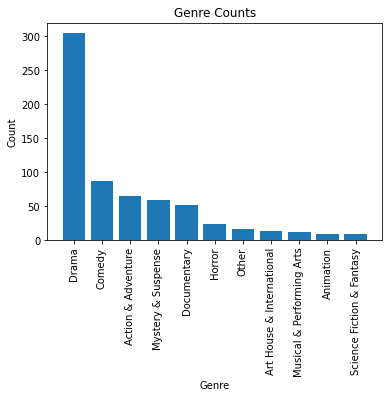

In [33]:
plt.bar(genre_df.index, genre_df['count'])
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Counts")

In [34]:
print("Total Counts: " + str(sum([x for x in genre_df['count']])))
print("Drama accounts for " + str(round(305/651, 2))[2:] + "% of genre counts.")

Total Counts: 651
Drama accounts for 47% of genre counts.


<div class="alert alert-block alert-success">
    <h3>Bar Chart Findings</h3>
The value that sticks out the most to me on this bar chart is how much larger the drama genre is compared to the other categories. It may be that the drama genre is the majority in this case, but if I were to do further digging into this I would investigate some of the movies with the drama category. It may be a mistake, or certain subcategories might automatically be filed into the drama category that could otherwise fit a different category. It just seems fishy that nearly 50 percent of the movies in this data set are drama.  
</div>

<div class="alert alert-block alert-info">

<h4> Problem 9 (20 points) </h4>

Visualization for communication: Find and represent something else (your choice) in the data with a visualization and analysis. Be sure that your graphic is easy to read, and include a summary of your interpretation/findings. This is where you can distinguish yourself and practice your skills.
    
I don't want to see 10 of the exact same responses here :) This is where you stake out your identity and show your skill. You may discuss your work with other students, but your work needs to be unique. For full credit, I want to see a good and thoughtful effort. 
    
</div>

<div class="alert alert-block alert-success">
    <h3>Bar Chart</h3>
Here I will determine if there is a correlation between the number of awards/nominations and the probability of being in the top 200 box office. To do this, I will change the yes and no values in the columns best_picnom, best_pic_win, best_actor_win, best_actress_win, best_dir_win to be a 1 for yes and 0 for no. This will enable easier data manipulation and analysis. After that, a new column will be added to the data frame to sum up these values in award column. From there you can add up how many yes's represent each award number.
</div>

In [35]:
#makign a copy of the df as to not mess up the orignial one
df_copy = df.copy()
#creating new column with an initial value of 0
df_copy['award'] = 0
#changing the yes and no's in the columns described above to either a 1 or 0 to make it easier to sum into the award column
df_copy['best_pic_nom'] = df_copy['best_pic_nom'].apply(lambda x:1 if x == 'yes' else 0)
df_copy['best_pic_win'] = df_copy['best_pic_nom'].apply(lambda x:1 if x == 'yes' else 0)
df_copy['best_actor_win'] = df_copy['best_actor_win'].apply(lambda x:1 if x == 'yes' else 0)
df_copy['best_actress_win'] = df_copy['best_actress_win'].apply(lambda x:1 if x == 'yes' else 0)
df_copy['best_dir_win'] = df_copy['best_dir_win'].apply(lambda x:1 if x == 'yes' else 0)

In [36]:
df_copy.head()

,title,title_type,genre,runtime,mpaa_rating,thtr_rel_year,thtr_rel_month,thtr_rel_day,imdb_rating,imdb_num_votes,...,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,imdb_url,rt_url,award
0,Filly Brown,Feature Film,Drama,80.0,R,2013.0,4.0,19.0,5.5,899,...,0,0,0,0,0,no,Michael D. Olmos,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/,0
1,The Dish,Feature Film,Drama,101.0,PG-13,2001.0,3.0,14.0,7.3,12285,...,0,0,0,0,0,no,Rob Sitch,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/,0
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,1996.0,8.0,21.0,7.6,22381,...,0,0,0,0,0,no,Christopher Guest,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/,0
3,The Age of Innocence,Feature Film,Drama,139.0,PG,1993.0,10.0,1.0,7.2,35096,...,0,0,1,0,1,no,Martin Scorsese,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/,0
4,Malevolence,Feature Film,Horror,90.0,R,2004.0,9.0,10.0,5.1,2386,...,0,0,0,0,0,no,Stevan Mena,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/,0


In [37]:
#adding up the awards into a series
award_sum = df_copy['best_pic_nom'] + df_copy['best_pic_win'] + df_copy['best_actor_win'] + df_copy['best_actress_win'] + df_copy['best_dir_win']
award_sum

0      0
1      0
2      0
3      2
4      0
      ..
646    0
647    0
648    0
649    0
650    0
Length: 651, dtype: int64

In [38]:
#assigning the series created above into the award column
df_copy['award'] = award_sum
df_copy.head()

,title,title_type,genre,runtime,mpaa_rating,thtr_rel_year,thtr_rel_month,thtr_rel_day,imdb_rating,imdb_num_votes,...,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,imdb_url,rt_url,award
0,Filly Brown,Feature Film,Drama,80.0,R,2013.0,4.0,19.0,5.5,899,...,0,0,0,0,0,no,Michael D. Olmos,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/,0
1,The Dish,Feature Film,Drama,101.0,PG-13,2001.0,3.0,14.0,7.3,12285,...,0,0,0,0,0,no,Rob Sitch,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/,0
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,1996.0,8.0,21.0,7.6,22381,...,0,0,0,0,0,no,Christopher Guest,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/,0
3,The Age of Innocence,Feature Film,Drama,139.0,PG,1993.0,10.0,1.0,7.2,35096,...,0,0,1,0,1,no,Martin Scorsese,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/,2
4,Malevolence,Feature Film,Horror,90.0,R,2004.0,9.0,10.0,5.1,2386,...,0,0,0,0,0,no,Stevan Mena,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/,0


### Getting the total count of each award value and obtaining the number of top200 box office hits in each category

In [39]:
df_copy['award'].value_counts()

0    475
1    134
2     31
3     10
4      1
Name: award, dtype: int64

In [40]:
df_copy['top200_box'][df_copy['award'] == 0].value_counts()

no     466
yes      9
Name: top200_box, dtype: int64

In [41]:
df_copy['top200_box'][df_copy['award'] == 1].value_counts()

no     131
yes      3
Name: top200_box, dtype: int64

In [42]:
df_copy['top200_box'][df_copy['award'] == 2].value_counts()

no    31
Name: top200_box, dtype: int64

In [43]:
df_copy['top200_box'][df_copy['award'] == 3].value_counts()

no     7
yes    3
Name: top200_box, dtype: int64

In [44]:
#creating new df to represent the values found above
awards_top200_box = pd.DataFrame()
award_values = [0, 1, 2, 3]
top200_box = [9, 3, 2, 1]
totals = [480, 138, 29, 4]
awards_top200_box['award_values'] = award_values
awards_top200_box['top200_count'] = top200_box
awards_top200_box['total'] = totals
#probability of being in top200 box office based off award_values
awards_top200_box['Probability of top200'] = round((awards_top200_box['top200_count'] / awards_top200_box['total']) * 100, 2)

In [45]:
awards_top200_box

,award_values,top200_count,total,Probability of top200
0,0,9,480,1.88
1,1,3,138,2.17
2,2,2,29,6.90
3,3,1,4,25.00


Text(0.5, 1.0, 'Probability of Award Value Achieving Top 200 Box Office')

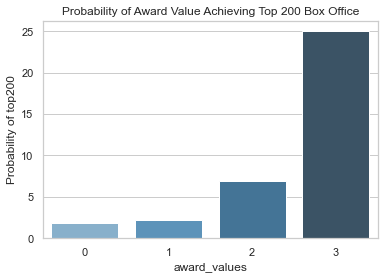

In [46]:
pcts = [(str(pct)+'%') for pct in awards_top200_box["Probability of top200"]]

sb.set_theme(style='whitegrid')
sb.barplot(x = awards_top200_box["award_values"], y = awards_top200_box["Probability of top200"], palette="Blues_d").set_title("Probability of Award Value Achieving Top 200 Box Office")

As expected, as the number of award value goes up, so does the probability of being in the top 200 box office. The award number with the most movies in the top 200 is 0. You would think that it would be 3 but this is due to the sheer amount of movies with 0 award value and 3 award value. 0 award value has a total of 480 movies while 3 has only 4, this means that if you have an award value of 3 then your probability of being in top 200 is 25% which is much higher than the other 3 categories. Movie directors and other professionals in the movie industry could use this information to achieve top 200 box office status by focusing on the accumulation of individual awards instead of a macro view of trying to maximize profit to achieve top 200. Another option for movie professionals would be to pump out many lower quality films and hope that one gets top 200. This is backed by the fact that 9 movies in the 0 award value category achieved top 200 despite lacking awards. 